# Andy Haldane speech analysis

The task below is to use Natural Language processing techniques to analyse and summarise key risks mentioned in the speeches of former Chief Economist of the Bank of England Andy Haldane. The speeches can be found here: https://www.bankofengland.co.uk/news/speeches. 

In total, 55 speeches were analysed.


## Data import
The data was imported from PDFs of the speeches as a long string. 

Cleansing the data was required to improve the performance of the analysis. The data cleaning performed included: 
- removing page numbers
- removing hyperlinks
- removing puncuation (some extra punction was added additional to the default list, like curly speech marks)
- stopwords
- lemmatisation of the text - standardising words, for example banks --> bank

During the analysis, a handful more stopwords were added to the default list to increase the performance of the analysis. The added stopwords were: 

- central, bank, et, al, et al, uk, chart, s 

At the end of this stage, the corpus consisted of a list of 55 strings of the cleansed text from the speeches.

In [6]:
from file_import import import_pdf
import glob
from tfidf import *
from co_occurance import *
import numpy as np

corpus=[]
publishing_dates = []
for file in list(glob.glob('speeches/*.pdf')):
    pdf, d = import_pdf(file)
    corpus.append(pdf)
    publishing_dates.append(d)


## Term Frequency - Inverse Document Frequency


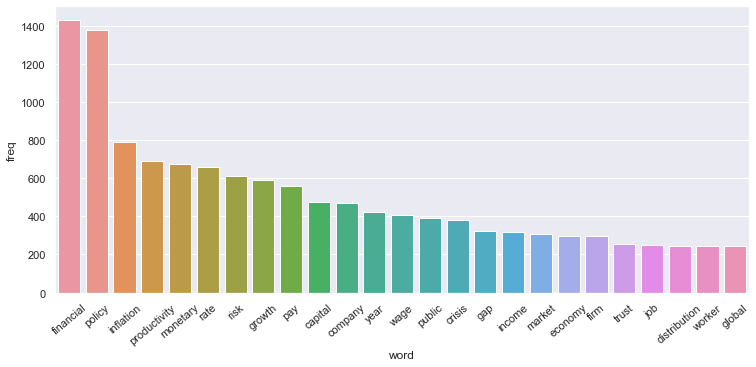

In [7]:
TFIDFvectorizer, feature_names = TFIDF(corpus)
results = corpus_resuts(corpus, TFIDFvectorizer, feature_names, 10)

def corpus_totals(corp, tfidf_results, top_n):
    totals = dict()
    for i in range(len(corp)):
        
        text=corpus[i].split()
        
        for j in range(len(tfidf_results[i])):
            tfidf_word = tfidf_results[i][j]
            count = text.count(tfidf_word)
            
            if tfidf_word in totals:
                totals[tfidf_word] += count
                
            else:
                totals[tfidf_word] = count
                
    totals = dict(sorted(totals.items(), key=lambda item: item[1], reverse=True))
    totals  = {k: totals[k] for k in list(totals)[:top_n]}
    
    return totals

top_words = corpus_totals(corpus, results, 25)
top_words = pd.DataFrame(top_words.items(), columns=['word','freq'])

import seaborn as sns
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(10.7,5.27)})
sns.barplot(x='word', y='freq', data=top_words)
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


Based on the results of the TF-IDF, key risk words were identified as 

I expected Brexit or Covid to feature in this list and was surprised they did not appear in the chart above.

In [ ]:
risks = ['inflation',
         'productivity',
         'risk',
         'growth',
         'pay',
         'capital',
         'wage', 
         'crisis',
         'gap',
         'income',
         'trust',
         'distribution']
#brexit and covid?!



In [ ]:
#Time series plot
def risks_time_series(corp, risk):
    time_series = pd.DataFrame(columns=['Date', 'Freq', 'Risk'])
    
    for r in risk:
        r_count = []
        
        for doc in corp:
            r_count.append(doc.count(r))
        
        r_ts = pd.DataFrame([publishing_dates, r_count]).transpose()
        r_ts.columns = ['Date', 'Freq']
        r_ts['Risk'] = r
        
        time_series = time_series.append(r_ts)
        
    return time_series

risk_ts = risks_time_series(corpus, risks)

#wide data for  plotting
risk_ts = risk_ts.pivot("Date", "Risk", "Freq")
sns.set(rc={'figure.figsize':(10.7,5.27)})
sns.lineplot(data=risk_ts, dashes=False)
plt.xticks('')
plt.show()